I did this a bit flippantly before, but I want to fomalize the process by which we estimate the uncertainty on emulator predictions. 

In [4]:
from pearce.emulator import LemonPepperWet
from GPy.kern import *
import numpy as np
from os import path

In [5]:
import matplotlib
#matplotlib.use('Agg')
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [6]:
training_file = '/home/users/swmclau2/scratch/Aemulators/ds_hsab_h/PearceHSABDsCosmo.hdf5'
test_file = '/home/users/swmclau2/scratch/Aemulators/ds_hsab_test_h/PearceHSABDsCosmoTest.hdf5'

In [7]:
em_method = 'gp'

In [8]:
fixed_params = {'z':0.0}

In [9]:
emu = LemonPepperWet(training_file, fixed_params = fixed_params)

3


In [10]:
pred_y, data_y = emu.goodness_of_fit(test_file, statistic = None)

(35, 7) (100, 7)
3
(35, 7) (7,) (18, 1)
(40, 1000, 18)
(35, 7)
(1, 7)
(18, 1)
(35, 7) (7,) (18, 1)
(40, 1000, 18)
(35, 7)
(1, 7)
(18, 1)
(35, 7) (7,) (18, 1)
(40, 1000, 18)
(35, 7)
(1, 7)
(18, 1)
(35, 7) (7,) (18, 1)
(40, 1000, 18)
(35, 7)
(1, 7)
(18, 1)
(35, 7) (7,) (18, 1)
(40, 1000, 18)
(35, 7)
(1, 7)
(18, 1)
(35, 7) (7,) (18, 1)
(40, 1000, 18)
(35, 7)
(1, 7)
(18, 1)
(35, 7) (7,) (18, 1)
(40, 1000, 18)
(35, 7)
(1, 7)
(18, 1)
(35, 7) (7,) (18, 1)
(40, 1000, 18)
(35, 7)
(1, 7)
(18, 1)
(35, 7) (7,) (18, 1)
(40, 1000, 18)
(35, 7)
(1, 7)
(18, 1)
(35, 7) (7,) (18, 1)
(40, 1000, 18)
(35, 7)
(1, 7)
(18, 1)
(35, 7) (7,) (18, 1)
(40, 1000, 18)
(35, 7)
(1, 7)
(18, 1)
(35, 7) (7,) (18, 1)
(40, 1000, 18)
(35, 7)
(1, 7)
(18, 1)
(35, 7) (7,) (18, 1)
(40, 1000, 18)
(35, 7)
(1, 7)
(18, 1)
(35, 7) (7,) (18, 1)
(40, 1000, 18)
(35, 7)
(1, 7)
(18, 1)
(35, 7) (7,) (18, 1)
(40, 1000, 18)
(35, 7)
(1, 7)
(18, 1)
(35, 7) (7,) (18, 1)
(40, 1000, 18)
(35, 7)
(1, 7)
(18, 1)
(35, 7) (7,) (18, 1)
(40, 1000, 18)
(

In [11]:
data_y.shape, pred_y.shape

((35, 100, 18), (100, 630))

In [12]:
pred_y = pred_y.reshape((100, 35, 18), order = 'F')

In [13]:
#pred_y = np.swapaxes(pred_y, 0, 1)

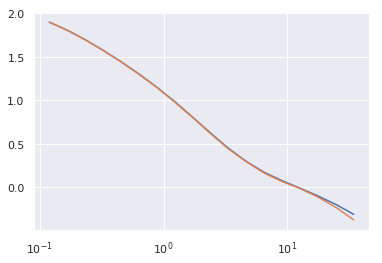

In [14]:
idx1, idx2 = 66, 10
plt.plot(emu.scale_bin_centers, pred_y[idx1, idx2, :])
plt.plot(emu.scale_bin_centers, data_y[idx2, idx1, :])
plt.xscale('log')

In [15]:
np.mean( np.abs(10**pred_y.swapaxes(0,1) - 10**data_y)/(10**data_y), axis = (0,1))

array([ 0.02322477,  0.01778819,  0.01466584,  0.01271747,  0.01172079,
        0.0115687 ,  0.01266164,  0.01490488,  0.01715634,  0.01941594,
        0.02066906,  0.02029788,  0.01964202,  0.02036174,  0.02345209,
        0.02816602,  0.03670859,  0.05698424])

In [16]:
np.mean( np.abs(10**pred_y.swapaxes(0,1) - 10**data_y)/(10**data_y), axis = (0,1,2))

0.021228122105258793

Contract over the realizations. 

In [17]:
pred_y_rs= pred_y.reshape((18,5,7, 1000), order = 'F')[:,0,:,:]
data_y_rs= data_y.reshape((18,5,7, 1000), order = 'F').mean(axis = 1)

ValueError: cannot reshape array of size 63000 into shape (18,5,7,1000)

In [ ]:
data_y_rs2 = data_y.resha]pe((18, 5, 7, 1000), order ='F')

In [ ]:
R = np.zeros((18,1000))
for i in xrange(7):
    R += (data_y_rs2[:,:,i,:] - data_y_rs[:,i,:].reshape((-1, 1, 1000))).mean(axis =1)

In [ ]:
cov = R.dot(R.T)/(R.shape[1]-1)

In [ ]:
im = plt.imshow(np.log10(cov))
plt.colorbar(im)

In [ ]:
R = (10**pred_y_rs - 10**data_y_rs).reshape((18,-1), order = 'F')

In [ ]:
cov2 = R.dot(R.T)/(R.shape[1]-1)

In [ ]:
im = plt.imshow(np.log10(cov2))
plt.colorbar(im)